<a href="https://colab.research.google.com/github/KilledByBugs/CE888_labs/blob/main/bank_classification(lab3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



In [87]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")

features = ["age","job","marital","education","default","housing","loan","contact","month","day_of_week","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

df[features].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [75]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,0,26,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,0,26,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,0,26,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,1,26,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,0,26,0,1,5,25,0,171,0,1


In [88]:
outcomes = ["y"]

df[outcomes].head()

#print(df[outcomes[-3:]].head().to_latex())

,y
0,no
1,no
2,no
3,no
4,no


In [89]:
# convert a string variable to a categorical one
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)
df = df.apply(LabelEncoder().fit_transform)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8,0


In [90]:

df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8,0


In [91]:
df = df.drop(['duration'], axis=1)


In [92]:
df = df.dropna()

In [93]:

X_df = df[features].copy()
y_df = df[outcomes].copy()
X = X_df.values
y = y_df.values


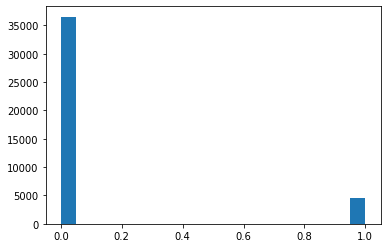

0    36548
1     4640
Name: y, dtype: int64
7.876724137931035


In [94]:

plt.hist(y, bins = 20)
plt.show()
# calculate the imbalance in the dataset.（ratio）
show_reuslt = df.y.value_counts()
print(show_reuslt)
imbalance = show_reuslt[0]/show_reuslt[1]
print(imbalance)

Using the train_test_split function in scikit-learn, separate your dataset into a training and a test set, with a test size of 20% and random_state=50. Make sure the train/test split is stratified (and check that it is!). Stratified means that the percentages of classes in each fold remains constant.


In [104]:
from sklearn.model_selection import train_test_split #GUANNAN ADDED
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


Report the results of 10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3. Ensure you're using an appropriate metric (Use sorted(sklearn.metrics.SCORERS.keys()) to see what are the valid options).


In [100]:
clf = RandomForestClassifier(n_estimators=300, max_depth=6) #n_estimators is the number of trees, defalt = 100
dummy_clf = DummyClassifier(strategy='stratified') # always predicts the mean of the training set
scores = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='f1')
dummy_scores = cross_val_score(dummy_clf, X_train, y_train.ravel(), cv=10, scoring='f1')

print("F1: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("Dummy F1: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

F1: 0.30633869 +/- 0.01985379
Dummy F1: 0.11168087 +/- 0.01781610


In [101]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8) #n_estimators is the number of trees, defalt = 100
dummy_clf = DummyClassifier(strategy='stratified') # always predicts the mean of the training set
scores = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='f1')
dummy_scores = cross_val_score(dummy_clf, X_train, y_train.ravel(), cv=10, scoring='f1')

print("F1: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("Dummy F1: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

F1: 0.33897718 +/- 0.01585191
Dummy F1: 0.11320478 +/- 0.01414132


In [102]:
clf = RandomForestClassifier(n_estimators=100, max_depth=12) #n_estimators is the number of trees, defalt = 100
dummy_clf = DummyClassifier(strategy='stratified') # always predicts the mean of the training set
scores = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring=make_scorer(mse))
dummy_scores = cross_val_score(dummy_clf, X_train, y_train.ravel(), cv=10, scoring=make_scorer(mse))

print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("Dummy MSE: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

MSE: 0.09866464 +/- 0.00307545
Dummy MSE: 0.20057663 +/- 0.00571408


In [103]:
clf.fit(X,y.ravel())
y_pred = clf.predict(X)
#cnf_matrix = confusion_matrix(y, y_pred)

In [67]:
import sklearn

In [71]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [68]:
sklearn.metrics.f1_score(y, y_pred)

0.2675114396339317

In [69]:
dummy_clf.fit(X,y.ravel())
y_pred_dummy = dummy_clf.predict(X)

In [70]:
sklearn.metrics.f1_score(y, y_pred_dummy)

0.11866608921611085

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[18 17 11 13 14 16 15  8  0 12  9  7 10  1  3  2  5  4  6]
Feature ranking:
1. nr.employed (0.219513)
2. euribor3m (0.188006)
3. pdays (0.111176)
4. poutcome (0.095972)
5. emp.var.rate (0.069176)
6. cons.conf.idx (0.068615)
7. cons.price.idx (0.049750)
8. month (0.037538)
9. age (0.035727)
10. previous (0.022775)
11. day_of_week (0.019641)
12. contact (0.017943)
13. campaign (0.015475)
14. job (0.014212)
15. education (0.013679)
16. marital (0.007008)
17. housing (0.004746)
18. default (0.004631)
19. loan (0.004417)


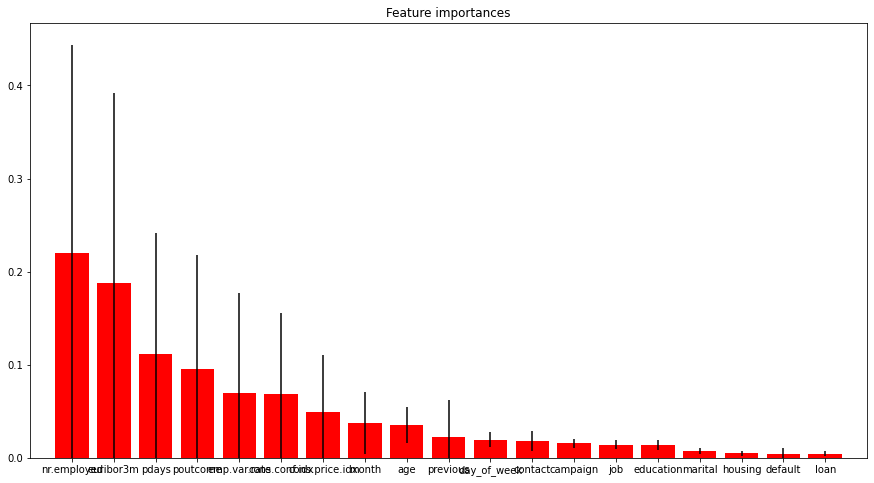

In [105]:
#importance
clf = RandomForestClassifier(n_estimators=400, max_depth=8) #n_estimators is the number of trees, defalt = 100
clf.fit(X,y)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')

In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']